In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import rand_score, adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# 1. Dataset

## 1.3 Loading data

### 1.3.1 Read data using np.load

In [3]:
path_temper = "D:/VScode/IPP_ML/temper.npz"
path_digit = "D:/VScode/IPP_ML/digits.npz"

with np.load(path_temper) as temper_data:
    temper = temper_data['data']
    villes = temper_data['villes']
    varname = temper_data['varname']

with np.load(path_digit) as digits_data:
    img = (digits_data['x'] / 255).reshape(3000, 28 ,28)
    img_train = (digits_data['xt'] / 255).reshape(1500, 28 ,28)
    img_label = digits_data['y']
    img_train_label = digits_data['yt']

### 1.3.2 Visualize and compute the mean

In [4]:
def plots(imgs, interp=False):
    imgs=np.array(imgs)
    mn,mx=imgs.min(),imgs.max()
    f = plt.figure(figsize=(12,24))
    for i in range(len(imgs)):
        sp=f.add_subplot(1, len(imgs), i+1)
        plt.axis('off')
        plt.imshow(imgs[i], interpolation=None if interp else 'none', vmin=mn,vmax=mx)

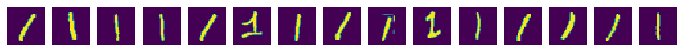

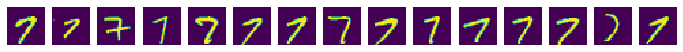

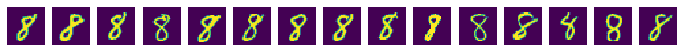

In [5]:
n_samples_per_class = int(img.shape[0] / 3)
n_sample_to_show = 15

plots(img[:15,:,:])
plots(img[n_samples_per_class:n_samples_per_class+n_sample_to_show,:,:])
plots(img[n_samples_per_class*2:n_samples_per_class*2+n_sample_to_show,:,:])

In [6]:
temper_df = pd.DataFrame(temper, columns=varname)
temper_df['cities'] = villes
temper_df.describe()

,January,February,March,April,May,June,July,August,September,October,November,December,Latitude,Longitude
count,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,3.973333,4.833333,8.233333,10.98000,14.433333,17.833333,19.833333,19.566667,16.986667,12.320000,7.926667,4.846667,46.053333,2.583333
std,2.007296,1.868409,1.529083,1.41482,1.504596,1.793507,2.128939,2.011988,1.848114,1.829988,1.803753,1.958449,2.290935,3.318136
min,0.400000,1.500000,5.600000,8.90000,11.600000,14.400000,15.600000,16.000000,14.700000,9.500000,4.900000,1.300000,43.200000,-4.290000
25%,2.400000,3.350000,7.550000,10.00000,13.700000,17.150000,18.900000,18.450000,15.850000,11.300000,6.600000,3.450000,43.950000,0.460000
50%,4.700000,5.300000,7.800000,10.70000,14.300000,17.500000,19.400000,19.100000,16.400000,11.600000,7.800000,5.400000,45.500000,3.050000
75%,5.550000,6.200000,9.550000,12.20000,15.350000,19.000000,20.900000,20.950000,18.450000,13.550000,9.050000,6.350000,48.150000,4.875000
max,7.500000,8.500000,10.800000,13.30000,16.800000,20.800000,23.300000,22.800000,20.300000,16.000000,11.500000,8.200000,50.400000,7.450000


Text(0, 0.5, 'Celcius')

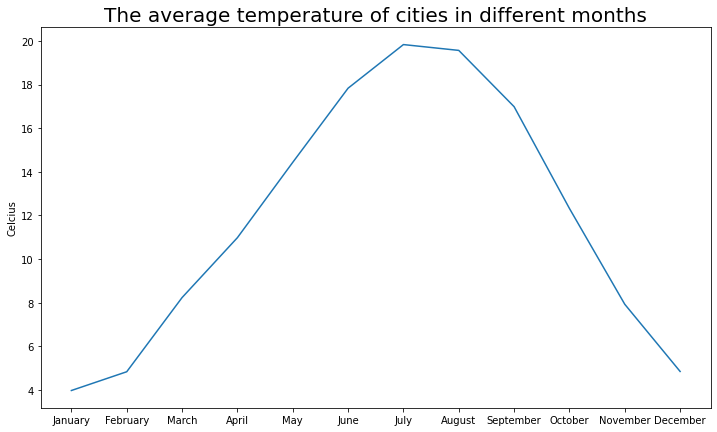

In [7]:
plt.figure(figsize=(12,7))
plt.plot(temper_df.mean().iloc[:12])
plt.title("The average temperature of cities in different months", size=20)
plt.ylabel('Celcius')

### 1.3.3 Reproduce the Figures

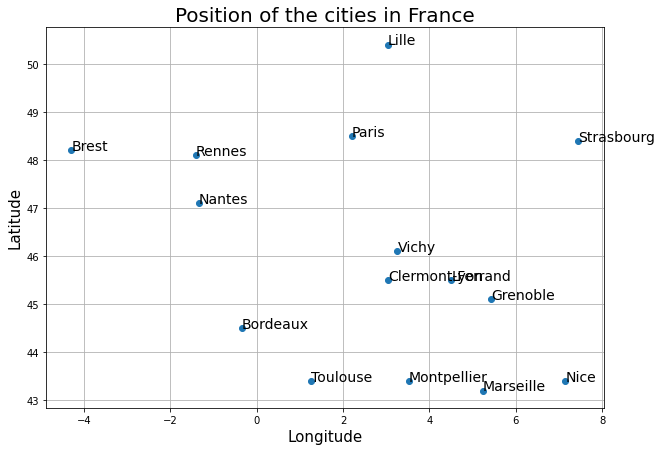

In [8]:
plt.figure(figsize=(10,7))
plt.scatter(temper_df['Longitude'], temper_df['Latitude'], label=temper_df['cities'])
plt.grid()
for i, txt in enumerate(temper_df['cities']):
    plt.annotate(txt, (temper_df['Longitude'].loc[i], temper_df['Latitude'].loc[i]), size=14)
plt.xlabel('Longitude', size=15)
plt.ylabel('Latitude', size=15)
plt.title("Position of the cities in France", size=20)
plt.show()

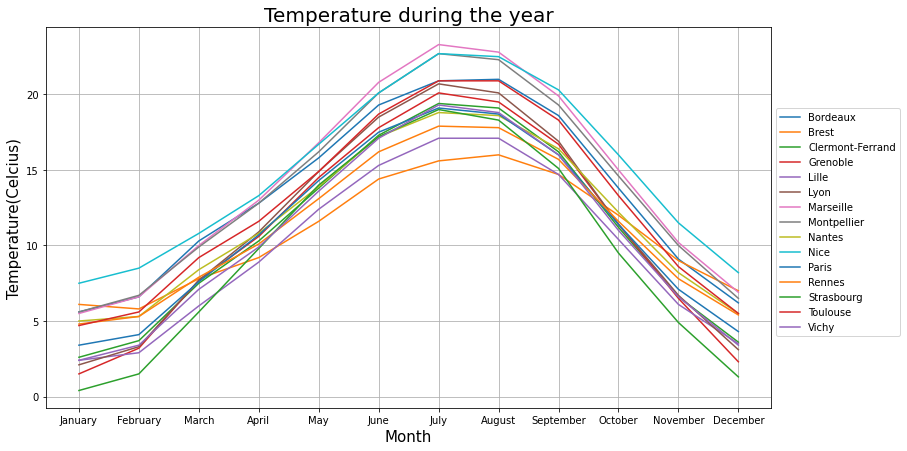

In [9]:
plt.figure(figsize=(13,7))
for i in range(temper_df.shape[0]):
    plt.plot(temper_df.columns[:12], temper_df.iloc[i][:12], label=temper_df.iloc[i].cities)
    plt.legend(loc=0, bbox_to_anchor=(1, 0.8))
plt.xlabel("Month", size=15)
plt.ylabel("Temperature(Celcius)", size=15)
plt.title("Temperature during the year", size=20)
plt.grid()
plt.show()

# 2. Clustering

## 2.1 For both datasets

### 2.1.1 & 2.1.2 Perform K-means, Plot the centroids

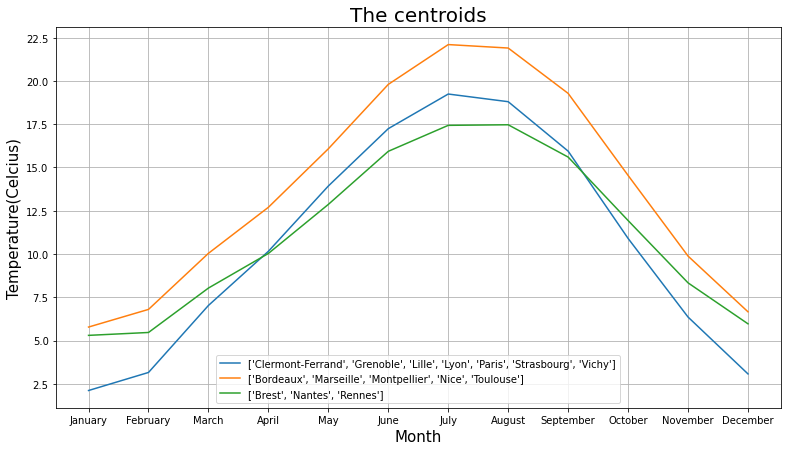

In [10]:
cluster_temper = KMeans(3)
y_hat = cluster_temper.fit_predict(temper_df.iloc[:,:-3]) # only use the temperature data
C = cluster_temper.cluster_centers_

plt.figure(figsize=(13,7))
for i in range(C.shape[0]):
    plt.plot(temper_df.columns[:12], C[i], label=list(temper_df.iloc[np.where(y_hat == i)].cities))
    plt.legend(loc=0)
plt.xlabel("Month", size=15)
plt.ylabel("Temperature(Celcius)", size=15)
plt.title("The centroids", size=20)
plt.grid()
plt.show()

The cities are divided into 3 classes, accoring to their average temperature, which is affected by their geographical position.

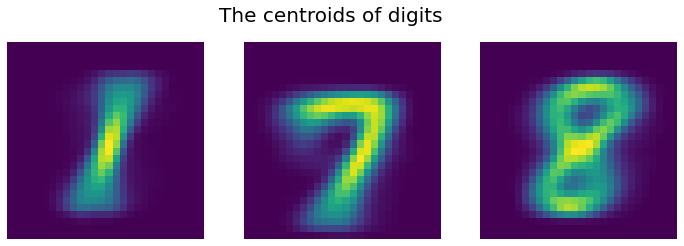

In [11]:
cluster_digits = KMeans(3)
y_hat_img = cluster_digits.fit_predict(img.reshape(3000, -1))
C_img = cluster_digits.cluster_centers_

f = plt.figure(figsize=(12,24))
f.suptitle("The centroids of digits", size=20)
for i in range(3):
    sp=f.add_subplot(1, 3, i+1)
    plt.axis('off')
    plt.imshow(C_img[i].reshape(28,28))
f.subplots_adjust(top=1.68)
plt.show()

The centroids of K-means are apparently three digits (1, 7, 8). We can deduce that the images are clustered by class on digits.

### 2.1.3 Change the value of K

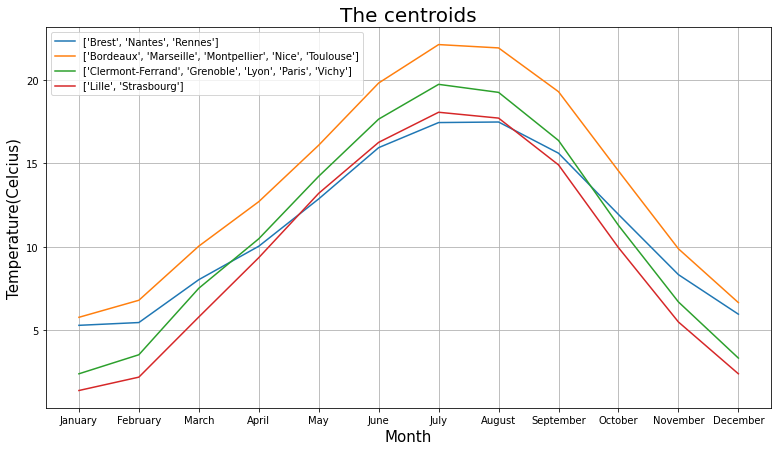

In [12]:
cluster_temper = KMeans(4)
y_hat = cluster_temper.fit_predict(temper_df.iloc[:,:-3]) # only use the temperature data
C = cluster_temper.cluster_centers_

plt.figure(figsize=(13,7))
for i in range(C.shape[0]):
    plt.plot(temper_df.columns[:12], C[i], label=list(temper_df.iloc[np.where(y_hat == i)].cities))
    plt.legend(loc=0)
plt.xlabel("Month", size=15)
plt.ylabel("Temperature(Celcius)", size=15)
plt.title("The centroids", size=20)
plt.grid()
plt.show()

For temperatures, K = 4 is better than K = 3.

In case of K = 4, Lille and Strasbourg are clustered to the new class. That corresponds to the fact that these two cities are located in the north-east of France, therefore with a lower average temperature.

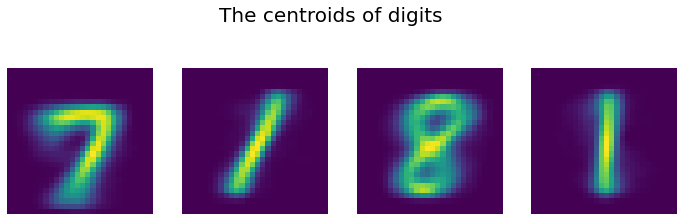

In [13]:
cluster_digits_K4 = KMeans(4)
y_hat_img_K4 = cluster_digits_K4.fit_predict(img.reshape(3000, -1))
C_img_K4 = cluster_digits_K4.cluster_centers_

f = plt.figure(figsize=(12,24))
f.suptitle("The centroids of digits", size=20)
for i in range(len(C_img_K4)):
    sp=f.add_subplot(1, len(C_img_K4), i+1)
    plt.axis('off')
    plt.imshow(C_img_K4[i].reshape(28,28))
f.subplots_adjust(top=1.68)
plt.show()

For digits, K=3 is better than K=4. 

There are two centroids which are almost identical. There is no progress when K increases from 3 to 4.

## 2.2 Temperature dataset

Just as we analysed in the section `2.1.3`, the clustering makes sens. 

Bordeaux, Marseille, Monpellier, Nice, Toulouse, clustered in one class, are both located in the south of France. 

Brest, Nantes, Renne, clustered in one class, are both located in the west of France. 

Same result for other cities.

### 2.2.2 

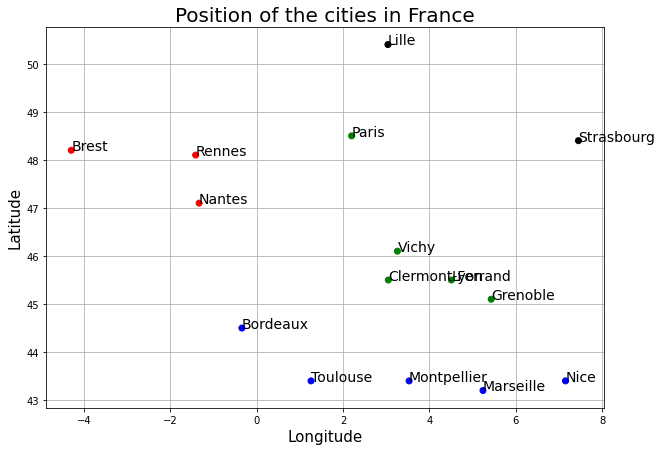

In [14]:
plt.figure(figsize=(10,7))
colors = {0:"red", 1:"blue", 2:"green", 3:"black"}
plt.scatter(temper_df['Longitude'], temper_df['Latitude'], label=temper_df['cities'], c=pd.Series(y_hat).map(colors))
plt.grid()
for i, txt in enumerate(temper_df['cities']):
    plt.annotate(txt, (temper_df['Longitude'].loc[i], temper_df['Latitude'].loc[i]), size=14)
plt.xlabel('Longitude', size=15)
plt.ylabel('Latitude', size=15)
plt.title("Position of the cities in France", size=20)
plt.show()

K-means clustering on temperature effectively recovers a geographical similarity between cities. 

This is because the geographical position affects strongly the average temperature. 

## 2.3 Digits dataset

### 2.3.1

In [15]:
for i in range(len(C_img)):
    print(f"Centroid {i+1} is a true image in dataset: {sum(np.all(img.reshape(3000,-1) == C_img[i], axis=1)) > 0}")

Centroid 1 is a true image in dataset: False
Centroid 2 is a true image in dataset: False
Centroid 3 is a true image in dataset: False


The centroids are not in dataset, which is normal. We have not forced the algorithm to choose centroid from dataset. 

In fact, there is a K-medoids version of K-means, which forces the algorithm to choose centroid from dataset.

### 2.3.2

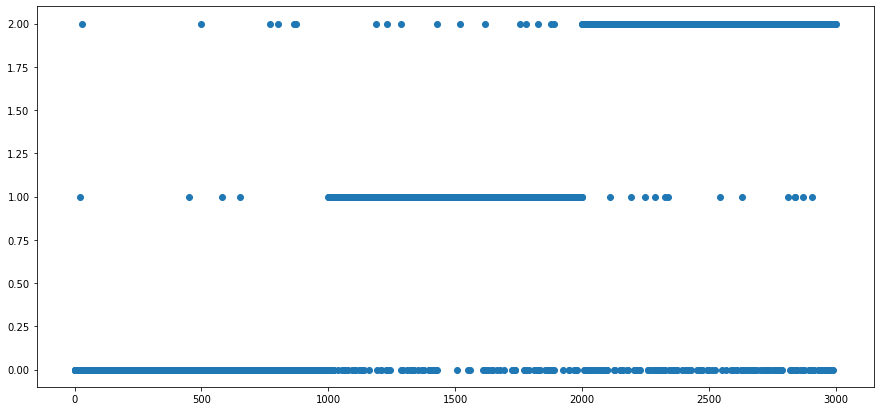

In [16]:
plt.figure(figsize=(15,7))
plt.scatter(range(len(y_hat_img)), y_hat_img)
plt.show()

The clustering is nearly piecewise constant. But there is still some errors, especially for class 0.

There are many samples wrongly clustered as class 0.

### 2.3.3

In [17]:
print(f"The RI score equals to {rand_score(labels_true=img_label.reshape(3000,), labels_pred=y_hat_img)}")
print(f"The adjusted RI score equals to {adjusted_rand_score(labels_true=img_label.reshape(3000,), labels_pred=y_hat_img)}")

The RI score equals to 0.8815562965432923
The adjusted RI score equals to 0.7353304173178205


### 2.3.4

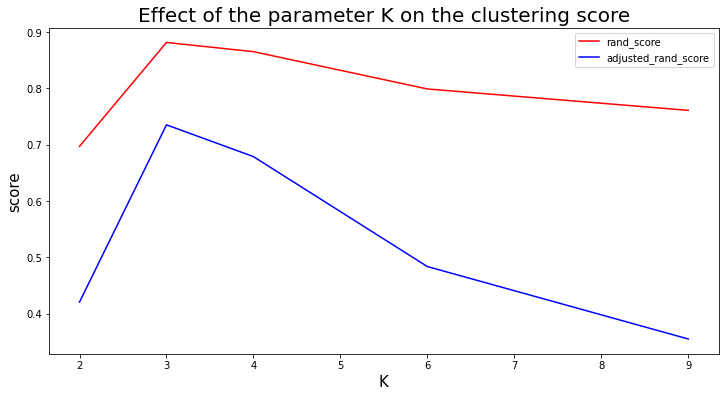

In [24]:
K_list = [2, 3, 4, 6, 9]
l_rand_score, l_adjusted_rand_score = [], []

for K in K_list:
    cluster_digits_ = KMeans(K)
    y_hat_ = cluster_digits_.fit_predict(img.reshape(3000, -1))
    C_img_ = cluster_digits_.cluster_centers_
    
    l_rand_score.append(rand_score(labels_true=img_label.reshape(3000,), labels_pred=y_hat_))
    l_adjusted_rand_score.append(adjusted_rand_score(labels_true=img_label.reshape(3000,), labels_pred=y_hat_))


plt.figure(figsize=(12, 6))
plt.title("Effect of the parameter K on the clustering score", size=20)
plt.plot(K_list, l_rand_score, c="red", label="rand_score")
plt.plot(K_list, l_adjusted_rand_score, c="blue", label="adjusted_rand_score")
plt.legend(loc=0)
plt.xlabel("K", size=15)
plt.ylabel("score", size=15)
plt.show()

According to our anticipation, the best value of K is 3. 

This is because the original number of classes is 3.

# 3. Density estimation

## 3.1 GMM For both datasets

### 3.1.1 & 3.1.2 Estimate a GMM density, Plot the centers

In [29]:
def GMM_temper(K, covariance_type='diag'):
    GMM_temper = GaussianMixture(K, covariance_type = covariance_type)
    GMM_temper.fit(temper_df.iloc[:,:-3])
    mus_temper = GMM_temper.means_
    y_GMM_temper = GMM_temper.predict(temper_df.iloc[:,:-3])
    plt.figure(figsize=(13,7))
    for i in range(K):
        plt.plot(temper_df.columns[:12], mus_temper[i])
    plt.xlabel("Month", size=15)
    plt.ylabel("Temperature(Celcius)", size=15)
    plt.title("The centroids for GMM", size=20)
    plt.grid()
    plt.show()

In [32]:
def GMM_img(K, covariance_type='diag'):
    GMM_img = GaussianMixture(K,covariance_type='diag')
    GMM_img.fit(img.reshape(3000, -1))
    mus_img = GMM_img.means_
    y_GMM_img = GMM_img.predict(img.reshape(3000, -1))

    f = plt.figure(figsize=(12,24))
    f.suptitle("The centroids of digits", size=20)
    for i in range(K):
        sp=f.add_subplot(1, K, i+1)
        plt.axis('off')
        plt.imshow(mus_img[i].reshape(28,28))
    f.subplots_adjust(top=1.68)
    plt.show()

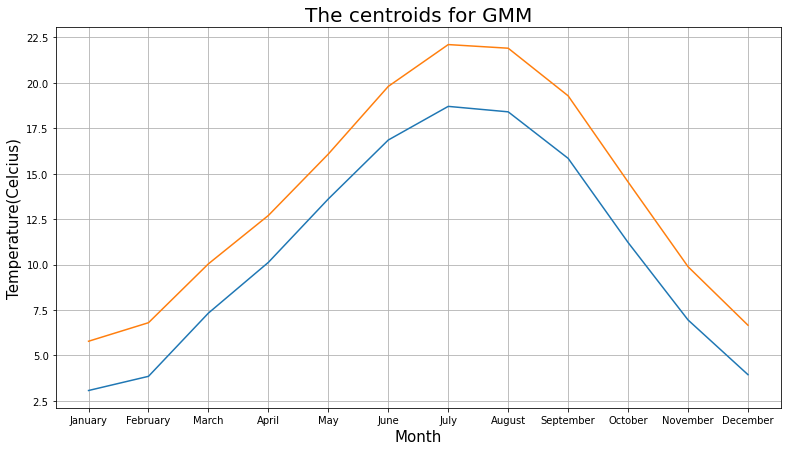

In [31]:
GMM_temper(K=2)

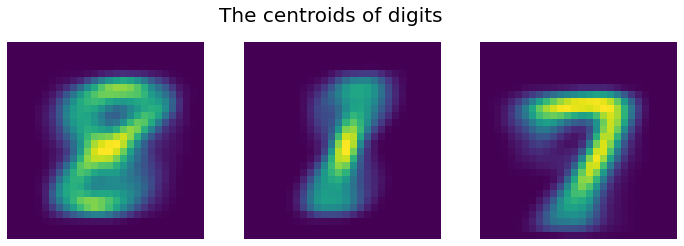

In [33]:
GMM_img(K=3)

GMM compute the probability according to the centers of the Gaussian distributions. 

Closer to the centers, bigger the probability.

### 3.1.3

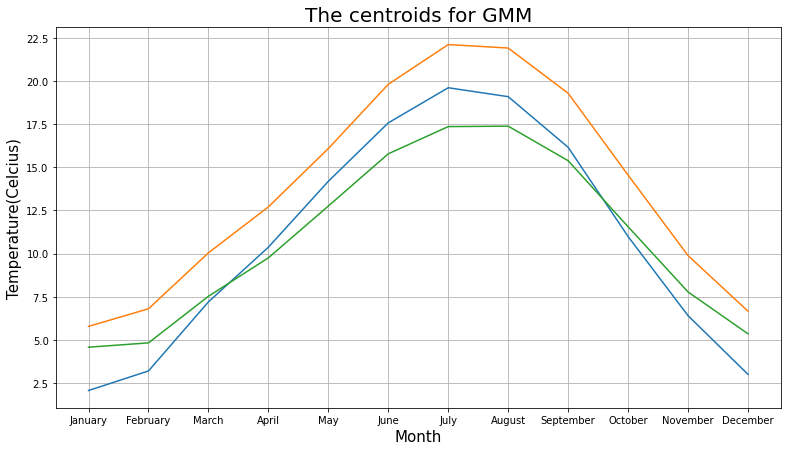

In [34]:
GMM_temper(K=3)

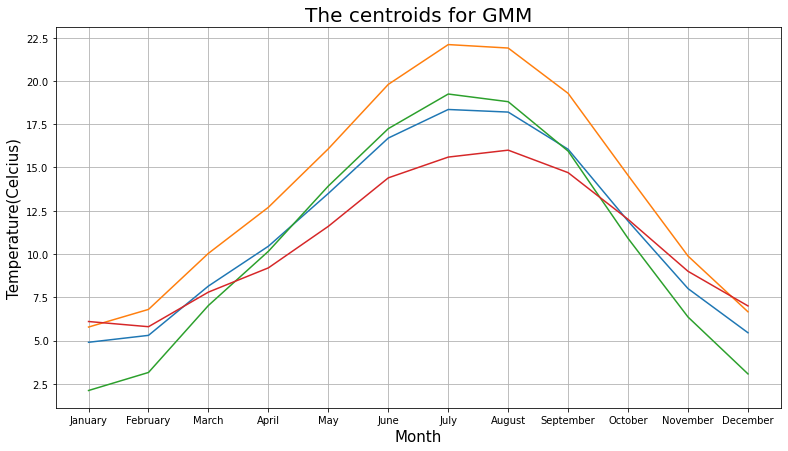

In [35]:
GMM_temper(K=4)

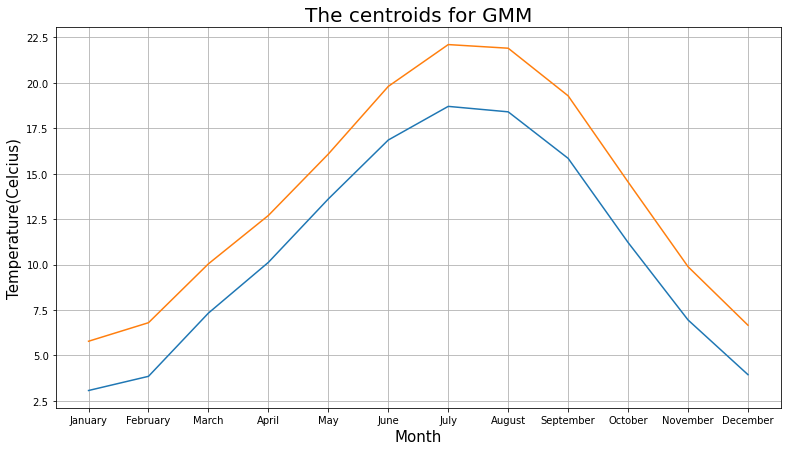

In [38]:
GMM_temper(K=2, covariance_type='full')

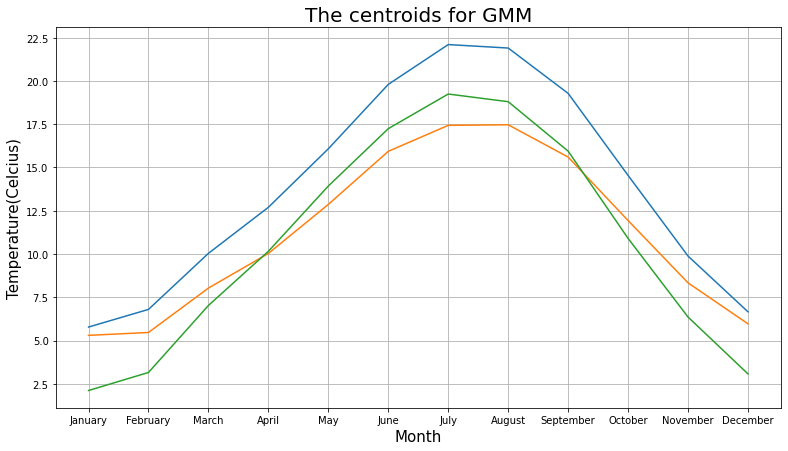

In [39]:
GMM_temper(K=3, covariance_type='full')

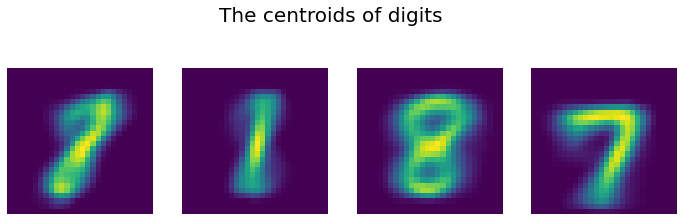

In [36]:
GMM_img(K=4)

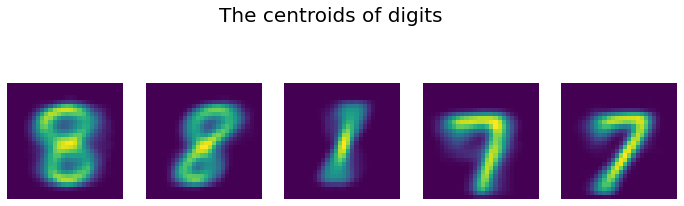

In [37]:
GMM_img(K=5)

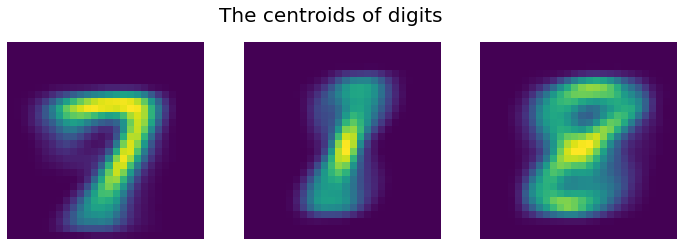

In [40]:
GMM_img(K=3, covariance_type='full')

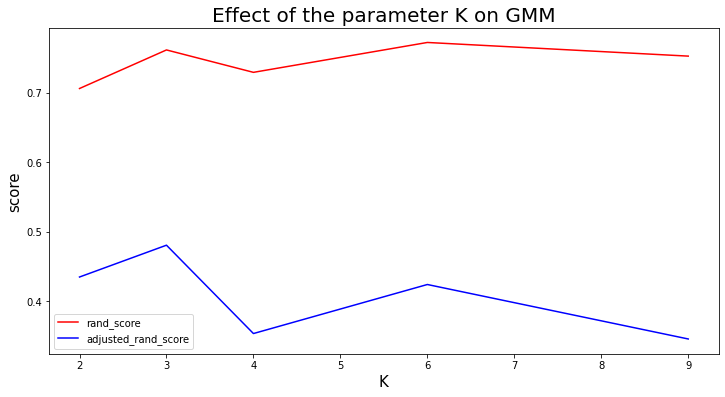

In [48]:
K_list = [2, 3, 4, 6, 9]
l_rand_score, l_adjusted_rand_score = [], []

for K in K_list:
    GMM_img_ = GaussianMixture(K, covariance_type='diag')
    GMM_img_.fit(img.reshape(3000, -1))
    mus_img = GMM_img.means_
    y_GMM_img_ = GMM_img_.predict(img.reshape(3000, -1))
    
    l_rand_score.append(rand_score(labels_true=img_label.reshape(3000,), labels_pred=y_GMM_img_))
    l_adjusted_rand_score.append(adjusted_rand_score(labels_true=img_label.reshape(3000,), labels_pred=y_GMM_img_))

plt.figure(figsize=(12, 6))
plt.title("Effect of the parameter K on GMM", size=20)
plt.plot(K_list, l_rand_score, c="red", label="rand_score")
plt.plot(K_list, l_adjusted_rand_score, c="blue", label="adjusted_rand_score")
plt.legend(loc=0)
plt.xlabel("K", size=15)
plt.ylabel("score", size=15)
plt.show()

### 3.1.4

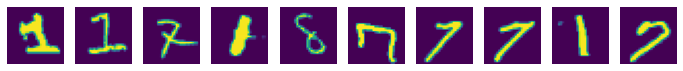

In [47]:
GMM_img = GaussianMixture(3, covariance_type='diag')
GMM_img.fit(img.reshape(3000, -1))
scores_img = GMM_img.score_samples(img.reshape(3000,-1))

n_outliers = 10
idx_outliers = sorted(range(len(scores_img)), key = lambda sub: scores_img[sub])[:n_outliers]

f = plt.figure(figsize=(12,24))
for i, ele in enumerate(idx_outliers):
    sp=f.add_subplot(1, len(idx_outliers), i+1)
    plt.axis('off')
    plt.imshow(img[ele])
f.subplots_adjust(top=1.68)
plt.show()

The figures above are 10 samples with smallest probability, when K=3, covariance is diagonal. 

They are considered as outliers because it is relatively diffcult to identify them.

### 3.1.5

In [50]:
GMM_img_ = GaussianMixture(3, covariance_type='diag')
GMM_img_.fit(img.reshape(3000, -1))
y_GMM_img_ = GMM_img_.predict(img.reshape(3000, -1))

print(f"For GMM, The RI score equals to {rand_score(labels_true=img_label.reshape(3000,), labels_pred=y_GMM_img_)}")
print(f"For GMM, The adjusted RI score equals to {adjusted_rand_score(labels_true=img_label.reshape(3000,), labels_pred=y_GMM_img_)}")

For GMM, The RI score equals to 0.7615936423252195
For GMM, The adjusted RI score equals to 0.48064532426789625


Both in K=3, compared to the scores of K-means (RI score = 0.88; adjusted RI score = 0.74), the performance of GMM on digits is not good.

### 3.1.6

In [56]:
def generate_samples(K, covariance_type='diag'):
    GMM_img_gen = GaussianMixture(3, covariance_type=covariance_type)
    GMM_img_gen.fit(img.reshape(3000, -1))

    n_sam = 10
    sam_generated, label_generated = GMM_img_gen.sample(n_sam)
    f = plt.figure(figsize=(12,24))
    for i in range(n_sam):
        sp=f.add_subplot(1, n_sam, i+1)
        plt.axis('off')
        plt.imshow(sam_generated[i].reshape(28,28))
    f.subplots_adjust(top=1.68)
    plt.show()

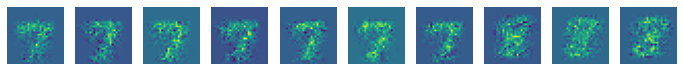

In [59]:
generate_samples(K=4, covariance_type='diag')

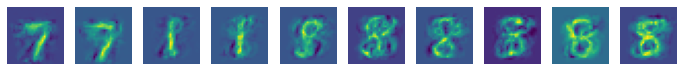

In [60]:
generate_samples(K=4, covariance_type='full')

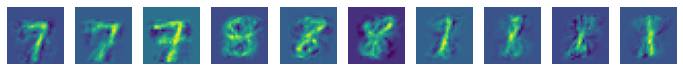

In [62]:
generate_samples(K=10, covariance_type='full')

We can easily differentiate them from real data. 

The main reason is that, there are always some "small values" (the green zone in the figures above) in the gaussian distribution, even on the border. But in the real data, the border is absolutely zero.

# 4. Dimensionality reduction

## 4.1 PCA

### 4.1.1 

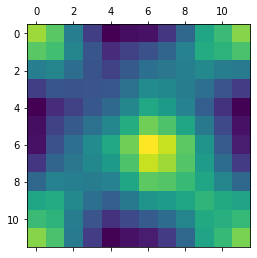

In [66]:
# For dataset temper:
plt.matshow(np.cov(temper_df.iloc[:,:-3].T))
plt.show()

On the diagonal, it's the variance of temperature each month. We notice that the variance in summer and in winter is bigger, which corresponds to our experience: the difference of temperature in summer and in winter is big between north and south. But in spring and in fall, there is no such big difference.

We also notice a strong correlation between temperature in Jan and in Dec. 

<Figure size 2160x2160 with 0 Axes>

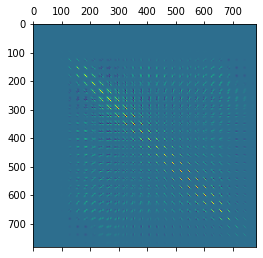

In [69]:
# For digits temper:
plt.matshow(np.cov(img.reshape(3000,-1).T))
plt.show()

For one pixel, it only has strong correlation with its surrounding pixel and itself. 

It is due to the fact that two remote pixels do not influence each other. 

Remark: it is one reason why we do not use fully connected neural network to deal with images (all pixels do not have equivalent relation between them). 

### 4.1.2

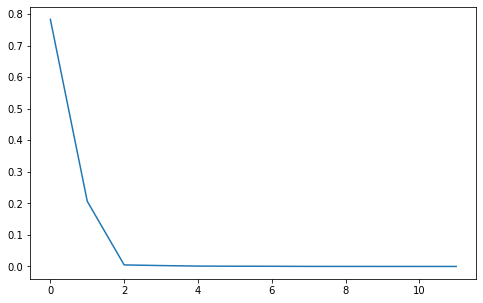

In [82]:
# For temper dataset:
pca_temper = PCA(n_components=None)
proj = pca_temper.fit_transform(temper_df.iloc[:,:-3])

plt.figure(figsize=(8,5))
plt.plot(pca_temper.explained_variance_ratio_)
plt.show()

If we project on p = 2 dimensions, we can perserve most of the information.

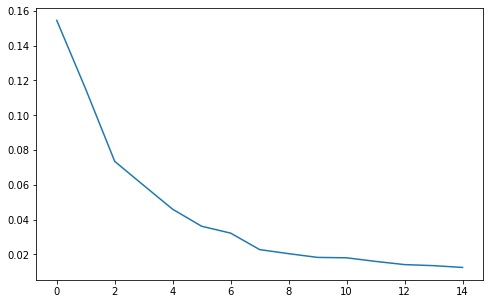

In [85]:
# For digits dataset:
pca_img = PCA(n_components=None)
proj_img = pca_img.fit_transform(img.reshape(3000,-1))

plt.figure(figsize=(8,5))
plt.plot(pca_img.explained_variance_ratio_[:15])
plt.show()

To better illustrate the explained_variance_ratio, I have restricted it to the first 15 biggest elements. 

When we projet to 2 dimensions, nearly 40% information is preserved. 

### 4.1.3

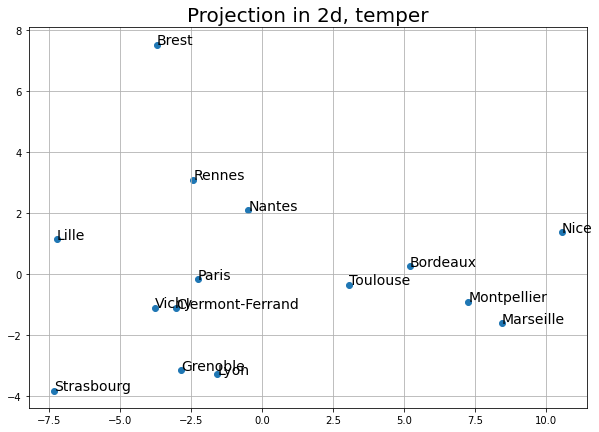

In [121]:
# For temper dataset:
pca_temper_2 = PCA(n_components=2)
proj_temper_2 = pca_temper_2.fit_transform(temper_df.iloc[:,:-3])

plt.figure(figsize=(10,7))
plt.scatter(proj_temper_2[:,0], proj_temper_2[:,1])
plt.grid()
for i, txt in enumerate(temper_df['cities']):
    plt.annotate(txt, (proj_temper_2[i,0], proj_temper_2[i,1]), size=14)
plt.title("Projection in 2d, temper", size=20)
plt.show()

The geographic information is preserved. For example, the cities in the south (such as Nice, Marseille, Montpellier) are in a same region on the 2d plan.

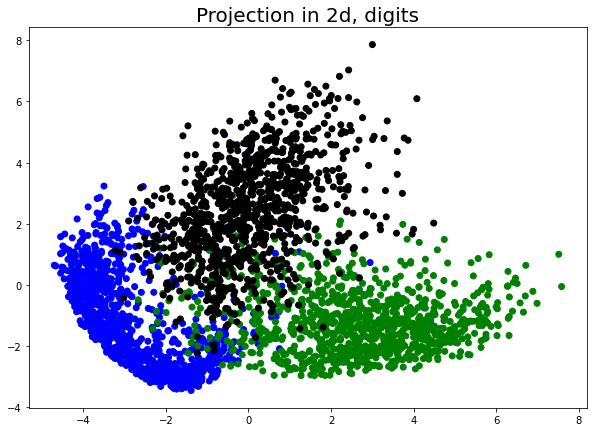

In [122]:
# For digits dataset:
pca_img_2 = PCA(n_components=2)
proj_img_2 = pca_img_2.fit_transform(img.reshape(3000,-1))

colors = {1:"blue", 7:"green", 8:"black"}
plt.figure(figsize=(10,7))
plt.scatter(proj_img_2[:,0], proj_img_2[:,1], c=pd.Series(img_label.reshape(3000,)).map(colors))

plt.title("Projection in 2d, digits", size=20)
plt.show()

The projection on 2d preserves much information: the samples in a same class are in a same region; the samples in different class are in different regions.

### 4.1.4

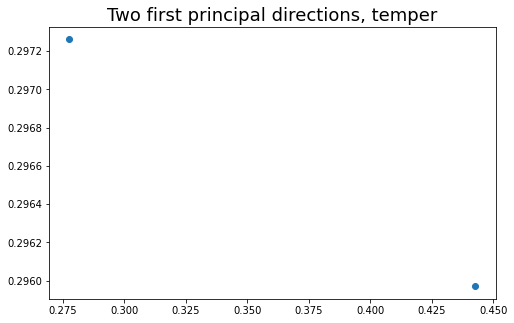

In [118]:
plt.figure(figsize=(8,5))
plt.scatter(pca_temper_2.components_[:,0], pca_temper_2.components_[:,1])
# plt.xlim(left=min(pca_temper_2.components_[:,0])/2, right=max(pca_temper_2.components_[:,0])*1.5)
# plt.ylim(bottom=min(pca_temper_2.components_[:,1])/2, top=max(pca_temper_2.components_[:,1])*1.5)
plt.title("Two first principal directions, temper", size=18)
plt.show()

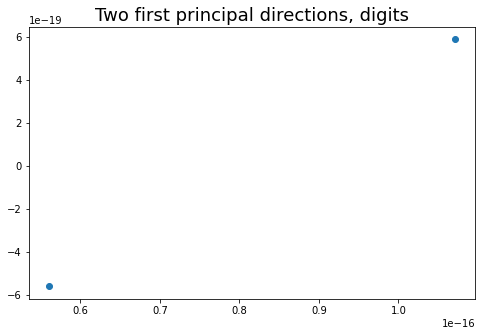

In [119]:
plt.figure(figsize=(8,5))
plt.scatter(pca_img_2.components_[:,0], pca_img_2.components_[:,1])
plt.title("Two first principal directions, digits", size=18)
plt.show()

The two first principal directions define a plan in 2 dimensions, on which the samples can be projected.

Moving along the those principal directions, means that we extract the largest amount of information (the variances are bigger than other directions).  

### 4.1.5

In [129]:
def reconstruct_pca_temper(p):
    pca_temper_ = PCA(n_components=p)
    proj_temper_ = pca_temper_.fit_transform(temper_df.iloc[:,:-3])
    temper_reconstruted = pca_temper_.inverse_transform(proj_temper_)

    plt.figure(figsize=(13,7))
    # we select 3 original samples
    for i in range(3):
        plt.plot(temper_df.columns[:12], temper_df.iloc[i][:12], label=temper_df.iloc[i].cities)
        plt.plot(temper_df.columns[:12], temper_reconstruted[i], label=temper_df.iloc[i].cities+"reconstructed")
        plt.legend(loc=0, bbox_to_anchor=(1, 0.8))
    plt.xlabel("Month", size=15)
    plt.ylabel("Temperature(Celcius)", size=15)
    plt.title(f"p={p}, Comparison between original samples and reconstructed samples", size=20)
    plt.grid()
    plt.show()

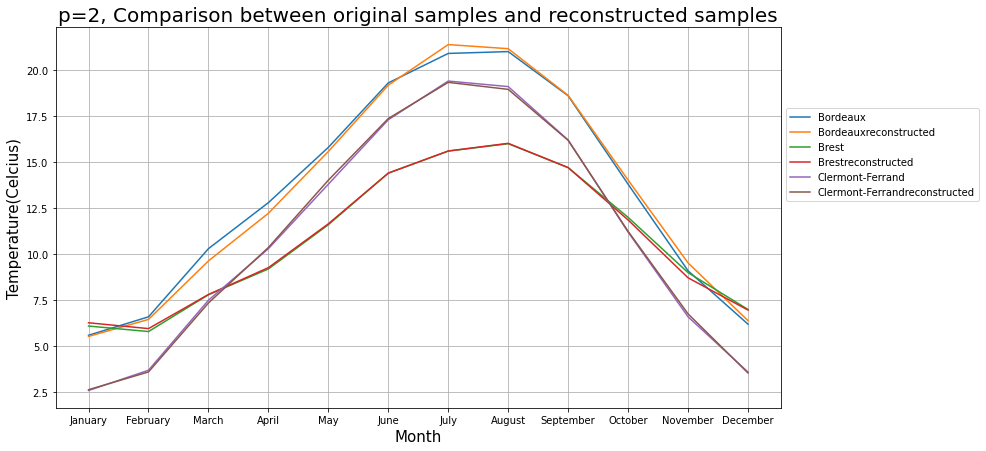

In [130]:
reconstruct_pca_temper(p=2)

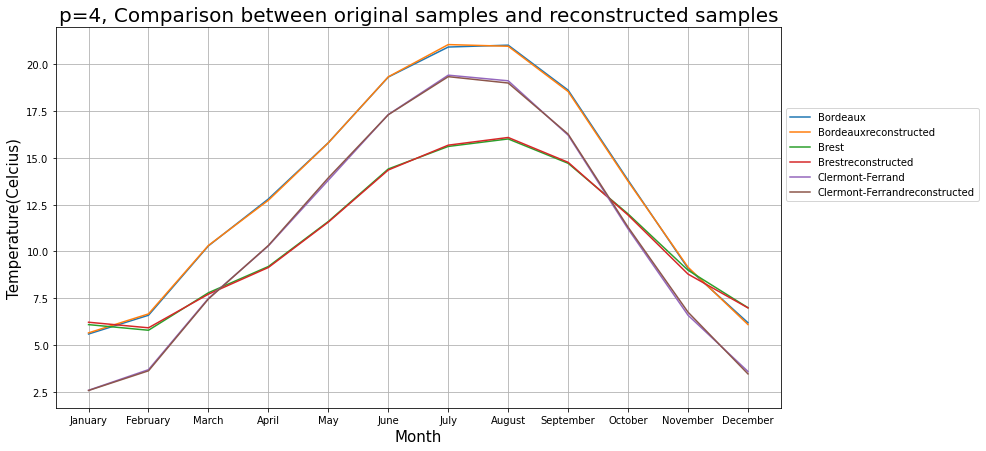

In [131]:
reconstruct_pca_temper(p=4)

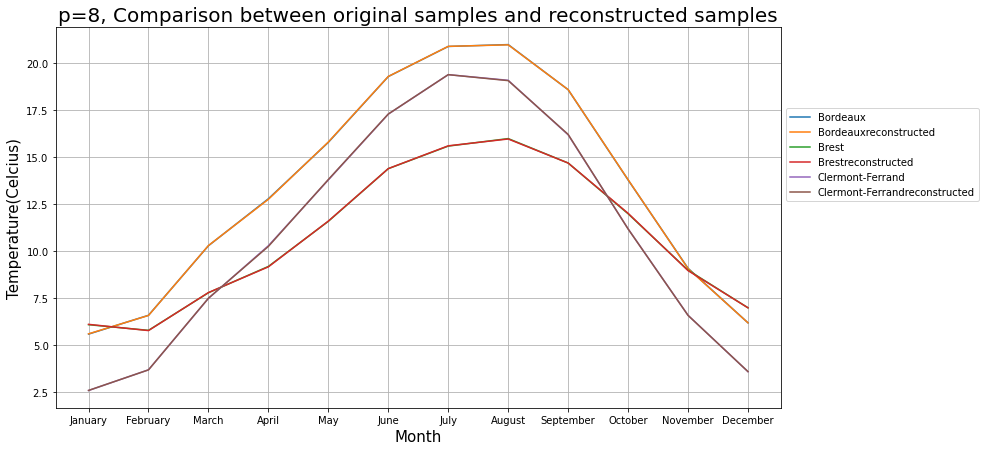

In [132]:
reconstruct_pca_temper(p=8)

For temper dataset, when p=2, the reconstruction is already pretty good (coincidence with original samples).

As for p=4, p=8, the reconstruction is almost complete. We could not recognize the difference between the original samples and reconstructed samples.

In [135]:
def reconstruct_pca_digits(p):
    pca_ = PCA(n_components=p)
    proj_ = pca_.fit_transform(img.reshape(3000,-1))
    digits_reconstruted = pca_.inverse_transform(proj_)

    f = plt.figure(figsize=(12,24))
    f.suptitle("Original samples", size=20)
    for i in range(3):
        sp=f.add_subplot(1, 3, i+1)
        plt.axis('off')
        plt.imshow(img[1000*i+i].reshape(28,28))
    f.subplots_adjust(top=1.68)

    f = plt.figure(figsize=(12,24))
    f.suptitle("Reconstructed samples", size=20)
    for i in range(3):
        sp=f.add_subplot(1, 3, i+1)
        plt.axis('off')
        plt.imshow(digits_reconstruted[1000*i+i].reshape(28,28))
    f.subplots_adjust(top=1.68)
    plt.show()

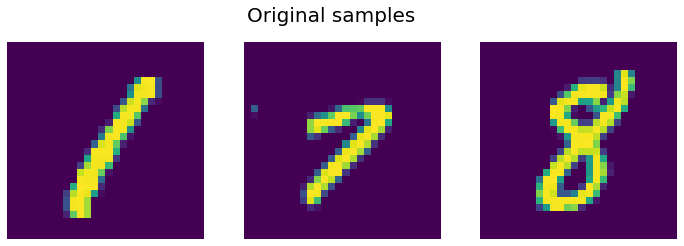

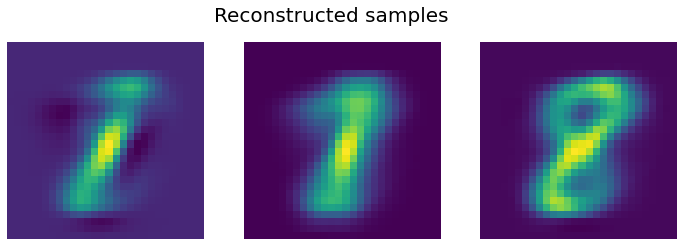

In [136]:
reconstruct_pca_digits(p=2)

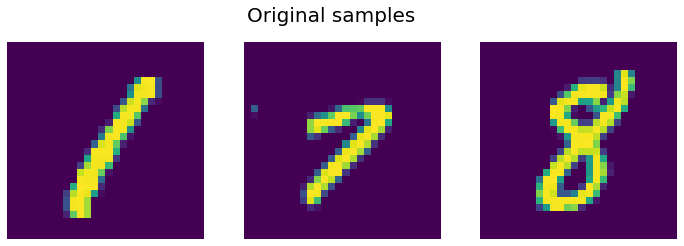

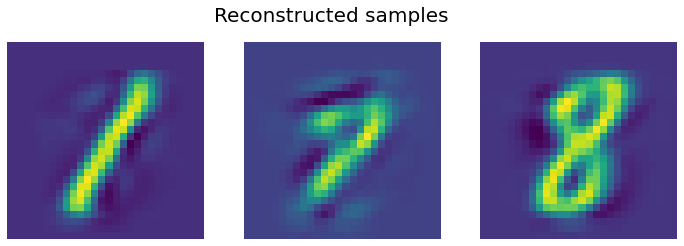

In [144]:
reconstruct_pca_digits(p=20)

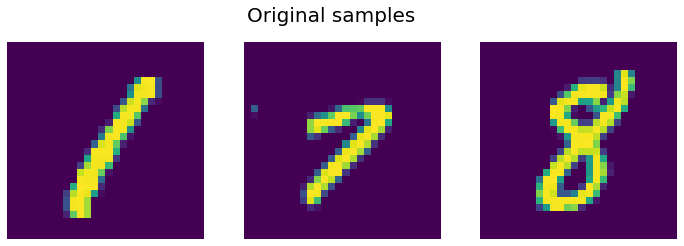

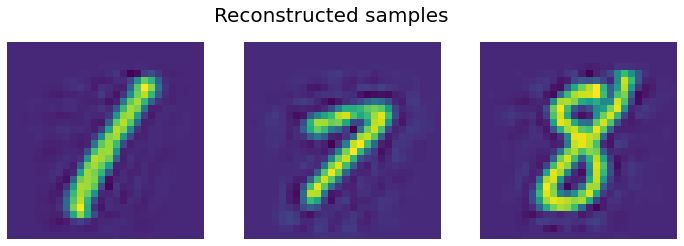

In [145]:
reconstruct_pca_digits(p=100)

As for digits dataset, the first two principal components are not sufficient to reconstruct the original samples. They are not recognizable. 

Even for p=20, the sample `7` is still not recognizable. We find that when p=100, the reconstruction is satisfactory.

## 4.2 Manifold Learning : TSNE

In [156]:
def Temper_TSNE_proj_2D(n_components=2, perplexity=5):
    temper_tSNE = TSNE(n_components=n_components, perplexity=perplexity)
    proj_temper_tSNE = temper_tSNE.fit_transform(temper_df.iloc[:,:-3])

    plt.figure(figsize=(10,7))
    plt.scatter(proj_temper_tSNE[:,0], proj_temper_tSNE[:,1])
    plt.grid()
    for i, txt in enumerate(temper_df['cities']):
        plt.annotate(txt, (proj_temper_tSNE[i,0], proj_temper_tSNE[i,1]), size=14)
    plt.title("TSNE projection in 2d, temper", size=20)
    plt.show()


In [157]:
def Digits_TSNE_proj_2D(n_components=2, perplexity=30):
    img_tSNE = TSNE(n_components=n_components, perplexity=perplexity)
    proj_img_tSNE = img_tSNE.fit_transform(img.reshape(3000,-1))

    colors = {1:"blue", 7:"green", 8:"black"}
    plt.figure(figsize=(10,7))
    plt.scatter(proj_img_tSNE[:,0], proj_img_tSNE[:,1], c=pd.Series(img_label.reshape(3000,)).map(colors))
    plt.title("TSNE projection in 2d, digits", size=20)
    plt.show()

c:\Users\yunhao\anaconda3\envs\psc\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\yunhao\anaconda3\envs\psc\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


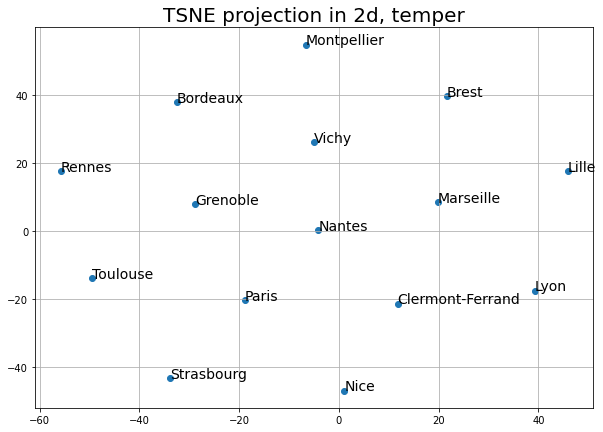

In [162]:
Temper_TSNE_proj_2D(perplexity=30) # by default in T-SNE, perplexity=30

c:\Users\yunhao\anaconda3\envs\psc\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\yunhao\anaconda3\envs\psc\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


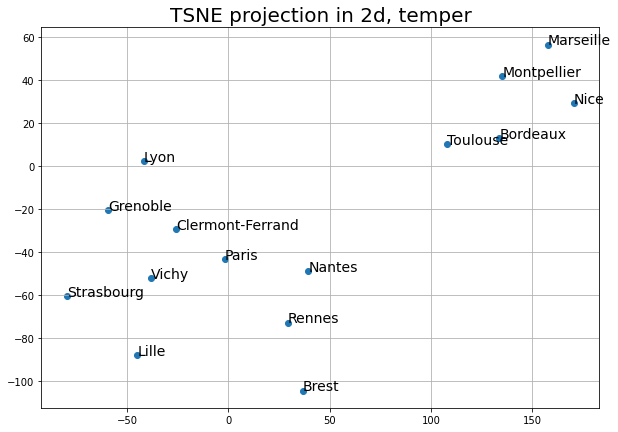

In [158]:
Temper_TSNE_proj_2D() # perplexity=5

c:\Users\yunhao\anaconda3\envs\psc\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\yunhao\anaconda3\envs\psc\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


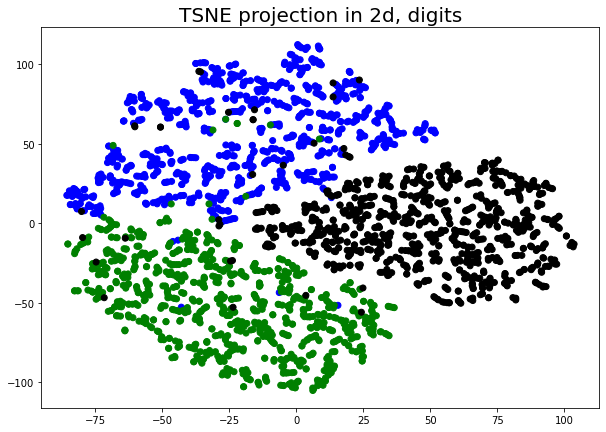

In [163]:
Digits_TSNE_proj_2D(perplexity=5)

c:\Users\yunhao\anaconda3\envs\psc\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\yunhao\anaconda3\envs\psc\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


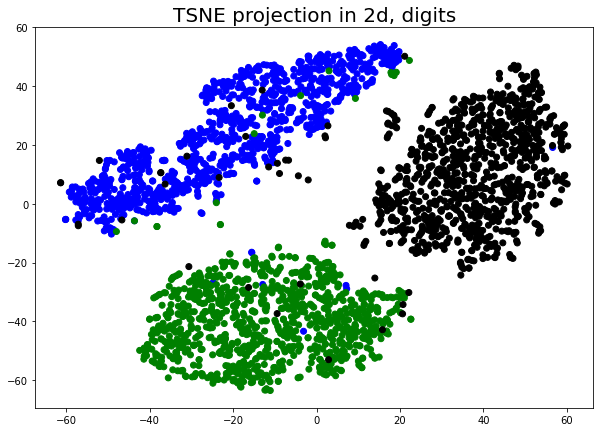

In [160]:
Digits_TSNE_proj_2D() # perplexity=30

The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. It must be less that the number of samples. Larger datasets usually require a larger perplexity. 

For digits dataset, `perplexity=30` is better than `perplexity=5`. And in case of `perplexity=30`, the embedding is more discriminant in 2D than PCA.

For temperature dataset, the embedding indeed recover geographical relations between cities, in case of `perplexity=5`. 

# Resume

Initailly, the code to plot the figures took me a long time. But gradually, I have been more and more familier with the commands in `matplotlib.pyplot`.

As for the machine learning methods discussed in this session, I understood their theoretical principles. However, I have never looked at their characteristics in details, on a real dataset. 

GMM is good at detecting the outliers in dataset, with the probability as criterion. But I also recognized its drawback when dealing with the digits: the gaussian properties make the probability on the border sligntly different from 0; but in real images, it is exactly 0 in those regions. That makes a recognizable difference between digits generated by GMM and original digits.

PCA is a linear projection, often used in dimensionality reduction. We can evaluate the amount of variance explained by each of the selected components through the attribute `explained_variance_ratio_`, which representes the several largest eigenvalues of the covariance matrix of X. when the dimension of one dataset is large (784 for digits), we then need a PCA with a larger number of components, in order to have a good reconstruction. In practice, it would be a useful tool to reduce dimension.

As for t-SNE, it is a non-linear algorithm, usually used to visualize the high dimensional data on 2D or 3D. Its performance is better than PCA (the embedding is more discriminant). However, different from PCA, t-SNE is irreproducible. Therefore, in most of the case, t-SNE serves only as a tool of visualization.
 